In [1]:
import arcgis

In [2]:
cd

c:\Users\pand8760


In [3]:
from arcgis.learn import prepare_data, MultiTaskRoadExtractor

In [4]:
import os, zipfile
from pathlib import Path
from arcgis.gis import GIS

In [5]:
gis = GIS(username="pand8760", password="Vadapav@103")

<Item title:"automatic_road_extraction_using_deep_learning" type:Image Collection owner:api_data_owner>
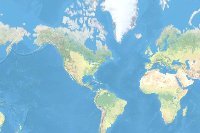

In [6]:
training_data = gis.content.get('b7bbf2f5f4184960890afeabbdb51a32')
training_data
#Download using the link below and use, do not use the download function from filepath.

In [14]:
filepath = r"c:\Users\pand8760\Downloads\automatic_road_extraction_using_deep_learning.zip"

In [15]:
with zipfile.ZipFile(filepath, 'r') as zip_ref:
    zip_ref.extractall(Path(filepath).parent)

In [16]:
output_path = Path(os.path.join(os.path.splitext(filepath)[0]))

In [17]:
data = prepare_data(output_path, chip_size=512, batch_size=4)

In [ ]:
#data.show_batch(alpha=1)

In [18]:
model = MultiTaskRoadExtractor(data, mtl_model="hourglass")

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\pand8760/.cache\torch\hub\checkpoints\resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

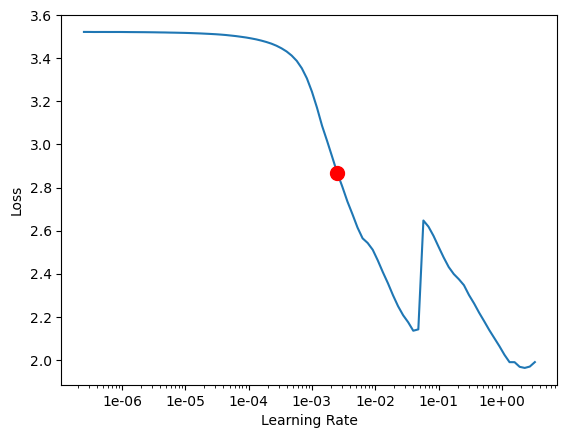

0.002511886431509582

In [19]:
model.lr_find()

In [21]:
model.fit(10, 0.002511886431509582, early_stopping=True)

epoch,train_loss,valid_loss,accuracy,miou,dice,time
0,0.038625,0.075527,0.987839,0.900464,0.865107,29:52
1,0.074142,0.207527,0.969767,0.733221,0.568486,29:54
2,0.061847,0.065493,0.989856,0.912486,0.872595,29:56
3,0.050448,0.087025,0.986521,0.881744,0.793156,28:32
4,0.033993,0.104257,0.987265,0.889037,0.805669,28:12
5,0.023351,0.032213,0.996056,0.964689,0.934840,29:41
6,0.017752,0.023063,0.997299,0.975795,0.959228,29:08
7,0.012165,0.020664,0.998283,0.984371,0.974473,29:32
8,0.009052,0.016454,0.998766,0.988682,0.976876,30:25
9,0.007942,0.016167,0.998888,0.989739,0.977564,30:23


In [22]:
model.save('road_model_for_spacenet_data')

Computing model metrics...


WindowsPath('c:/Users/pand8760/Downloads/automatic_road_extraction_using_deep_learning/models/road_model_for_spacenet_data')

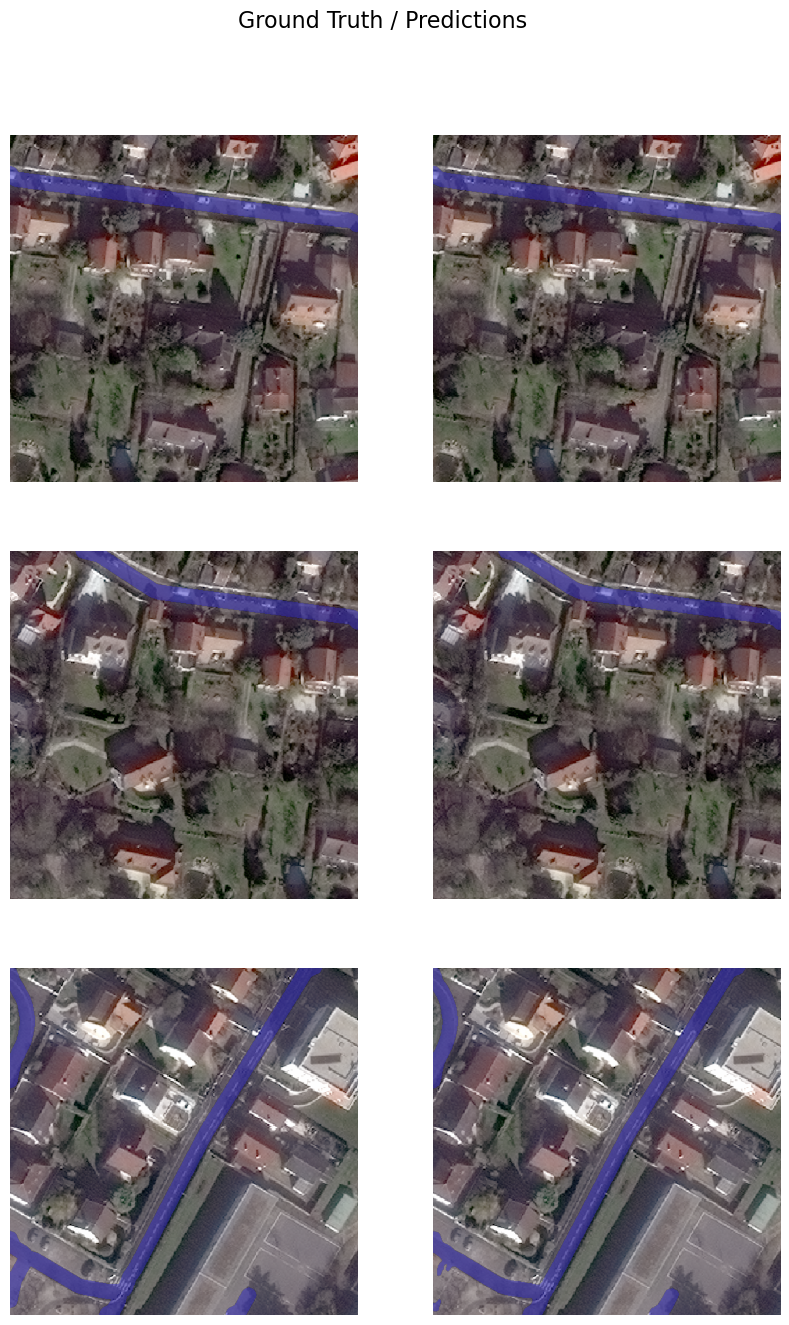

In [24]:
model.show_results(rows=3)